In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("./files/all/all_2.csv")
df

,date,CA,CB,GO,PB,ST
0,2020-01-01,96.39,0.00,0.00,0.00,0.00
1,2020-01-02,96.85,77.58,143.95,253.28,194.59
2,2020-01-03,96.84,78.03,145.86,255.12,194.12
3,2020-01-06,96.67,77.50,147.39,254.16,193.81
4,2020-01-07,97.00,77.73,147.97,254.36,194.30
...,...,...,...,...,...,...
279,2020-12-25,90.32,0.00,0.00,0.00,0.00
280,2020-12-28,90.34,0.00,175.71,253.55,204.02
281,2020-12-29,89.99,80.86,176.35,253.82,204.00
282,2020-12-30,89.68,80.42,177.70,253.84,203.32


### Mean Imputer

In [38]:
df.replace(0, np.nan, inplace=True)
df.fillna(df.loc[:, ['CA', 'CB', 'GO', 'PB', 'ST']].mean(), inplace=True)
df

,date,CA,CB,GO,PB,ST
0,2020-01-01,96.39,80.619331,167.2564,260.346235,185.298785
1,2020-01-02,96.85,77.580000,143.9500,253.280000,194.590000
2,2020-01-03,96.84,78.030000,145.8600,255.120000,194.120000
3,2020-01-06,96.67,77.500000,147.3900,254.160000,193.810000
4,2020-01-07,97.00,77.730000,147.9700,254.360000,194.300000
...,...,...,...,...,...,...
279,2020-12-25,90.32,80.619331,167.2564,260.346235,185.298785
280,2020-12-28,90.34,80.619331,175.7100,253.550000,204.020000
281,2020-12-29,89.99,80.860000,176.3500,253.820000,204.000000
282,2020-12-30,89.68,80.420000,177.7000,253.840000,203.320000


In [39]:
def create_portfolio(assets, weights):
    portfolio = {}
    assets = assets.replace(" ","").split("/")
    weights = weights.replace(" ","").split("/")

    if not len(assets) == len(weights): return -1

    for a, w in zip(assets, weights):
        portfolio[a] = w

    return portfolio

In [40]:
assets = ["ST / CB / PB / GO / CA",
          "ST / CB / PB / GO / CA",
          "ST / CB / PB / GO / CA",
          "ST / CB / PB / GO / CA"
          ]
weights = ["50 / 20 / 20 / 0 / 10",
           "10 / 20 / 20 / 40 / 10",
           "50 / 40 / 10 / 0 / 0",
           "0 / 20 / 20 / 60 / 0"
           ]

pandas_dict = {
    "ST": [],
    "CB": [],
    "PB": [],
    "GO": [],
    "CA": [],
}

print("-----------------------------")
for index, (a, w) in enumerate(zip(assets, weights)):
    portfolio = create_portfolio(a, w)
    print(f"Portfolio {index + 1}")
    for asset in portfolio.keys():
        pandas_dict[asset].append(portfolio[asset])
        print(f"{asset}: {portfolio[asset]}%")
    print("-----------------------------")

df_portfolio = pd.DataFrame(pandas_dict)

-----------------------------
Portfolio 1
ST: 50%
CB: 20%
PB: 20%
GO: 0%
CA: 10%
-----------------------------
Portfolio 2
ST: 10%
CB: 20%
PB: 20%
GO: 40%
CA: 10%
-----------------------------
Portfolio 3
ST: 50%
CB: 40%
PB: 10%
GO: 0%
CA: 0%
-----------------------------
Portfolio 4
ST: 0%
CB: 20%
PB: 20%
GO: 60%
CA: 0%
-----------------------------


In [41]:
df_portfolio

,ST,CB,PB,GO,CA
0,50,20,20,0,10
1,10,20,20,40,10
2,50,40,10,0,0
3,0,20,20,60,0


In [42]:
def calculate_shares(date, budget, assets_df, prices_df):
    all_res = {}
    for i in range(len(assets_df)):
        res = {
            "asset": [],
            "percentage": [],
            "amount": [],
            "price": [],
            "shares": []
        }
        # Get the price of each asset on the given date
        prices = prices_df.loc[prices_df["date"] == date, assets_df.columns]
        res['asset'] = prices.columns.tolist()
        res['percentage'] = assets_df.values.astype(int).tolist()[i]
        prices_list = prices.values.tolist()[0]
        prices_list[res['asset'].index("CA")] = 1
        res['price'] = prices_list
        res['amount'] = [budget * (p / 100)for p in res['percentage']]
        res['shares'] = [round(amount / price, 1) if price != 0 else 0.0 for amount, price in zip(res['amount'], res['price'])]

        # Create the output dataframe
        output_df = pd.DataFrame(res)
        all_res[f"portfolio_{i}"] = output_df

    return all_res

In [43]:
def calculate_late_shares(date, budget, assets_df, prices_df):
    all_res = {}
    for i in range(len(assets_df)):
        res = {
            "asset": [],
            "percentage": [],
            "amount": [],
            "price": [],
            "shares": []
        }
        # Get the price of each asset on the given date
        prices = prices_df.loc[prices_df["date"] == date, assets_df.columns]
        res['asset'] = prices.columns.tolist()
        res['percentage'] = assets_df.values.astype(int).tolist()[i]
        prices_list = prices.values.tolist()[0]
        prices_list[res['asset'].index("CA")] = 1/(prices_list[res['asset'].index("CA")]/100)
        res['price'] = prices_list
        res['amount'] = [budget * (p / 100)for p in res['percentage']]
        res['shares'] = [round(amount / price, 1) if price != 0 else 0.0 for amount, price in zip(res['amount'], res['price'])]

        # Create the output dataframe
        output_df = pd.DataFrame(res)
        all_res[f"portfolio_{i}"] = output_df

    return all_res

In [44]:
budget = 10000
date = "2020-01-01"
investments = calculate_shares(date, budget, df_portfolio, df)

In [45]:
print("--------------------------------------------")
for elem in investments:
    print(f"Investment for {elem}:")
    print(investments[elem].head())
    print("\n--------------------------------------------\n")


--------------------------------------------
Investment for portfolio_0:
  asset  percentage  amount       price  shares
0    ST          50  5000.0  185.298785    27.0
1    CB          20  2000.0   80.619331    24.8
2    PB          20  2000.0  260.346235     7.7
3    GO           0     0.0  167.256400     0.0
4    CA          10  1000.0    1.000000  1000.0

--------------------------------------------

Investment for portfolio_1:
  asset  percentage  amount       price  shares
0    ST          10  1000.0  185.298785     5.4
1    CB          20  2000.0   80.619331    24.8
2    PB          20  2000.0  260.346235     7.7
3    GO          40  4000.0  167.256400    23.9
4    CA          10  1000.0    1.000000  1000.0

--------------------------------------------

Investment for portfolio_2:
  asset  percentage  amount       price  shares
0    ST          50  5000.0  185.298785    27.0
1    CB          40  4000.0   80.619331    49.6
2    PB          10  1000.0  260.346235     3.8
3    GO  

# 1.2 Investment Strategy Performance

## Return

In [46]:
current_investments = calculate_late_shares("2020-12-31", budget, df_portfolio, df)

In [47]:
for portfolio, late_portfolio in zip(investments.keys(), current_investments.keys()):

    aux_late_portfolio = current_investments[late_portfolio]
    current_value = sum(aux_late_portfolio['shares'].iloc[i] * aux_late_portfolio['price'].iloc[i] for i in range(len(aux_late_portfolio)))

    aux_portfolio = investments[portfolio]
    buy_amount = sum(aux_portfolio['shares'].iloc[i] * aux_portfolio['price'].iloc[i] for i in range(len(aux_portfolio)))
    portfolio_return = (current_value - buy_amount) / buy_amount * 100
    sign = "Positive" if portfolio_return > 0 else "Negative"
    print(f"Return value for {portfolio}: {round(portfolio_return, 2)}% ({sign})")

Return value for portfolio_0: -0.11% (Negative)
Return value for portfolio_1: -0.0% (Negative)
Return value for portfolio_2: -0.11% (Negative)
Return value for portfolio_3: -0.12% (Negative)


## Volatility

In [48]:
def get_values_from_portfolio(pf):
    res = []
    for i, day in df.iterrows():
        value = 0
        for elem in pf['asset'].values:
            if elem == 'CA':
                value += float(pf.loc[pf['asset'] == elem]['shares'] * day[elem]/100)
            else:
                value += float(pf.loc[pf['asset'] == elem]['shares'] * day[elem])
        res.append(value)
    return res

In [49]:
def get_mean(values):
    n = len(values)
    s = sum(values)
    mean = s / n
    return mean

In [50]:
import math
def get_std_from_values(values):
    n = len(values)
    mean = get_mean(values)

    sum_diff = sum([(x - mean) ** 2 for x in values])
    res = math.sqrt(sum_diff / (n - 1))
    return res

In [51]:
def get_volatility(std, mean):
    res = std / mean * 100
    return res

In [52]:
for elem in investments.keys():
    values = get_values_from_portfolio(investments[elem])
    mean = get_mean(values)
    std = get_std_from_values(values)
    volatility = get_volatility(std, mean)
    print(f"Volatility for {elem}: {round(volatility, 2)}%")

Volatility for portfolio_0: 3.5%
Volatility for portfolio_1: 3.32%
Volatility for portfolio_2: 3.92%
Volatility for portfolio_3: 4.81%


# 1.3 Tasks related to investment strategies generation

### Portfolio allocation

In [53]:
from itertools import product
valid_weights = []
for w in product([0, 20, 40, 60, 80, 100], repeat = 5):
    if sum(w) == 100:
        portfolio_str = "/".join(str(i) for i in w)
        valid_weights.append(portfolio_str)
valid_weights.reverse()
print(f"Number of valid portfolios: {len(valid_weights)}")

Number of valid portfolios: 126


In [54]:
assets = ["ST / CB / PB / GO / CA"] * len(valid_weights)
weights = valid_weights

pandas_dict = {
    "ST": [],
    "CB": [],
    "PB": [],
    "GO": [],
    "CA": [],
}

for index, (a, w) in enumerate(zip(assets, weights)):
    portfolio = create_portfolio(a, w)
    for asset in portfolio.keys():
        pandas_dict[asset].append(portfolio[asset])

df_portfolio_allocation = pd.DataFrame(pandas_dict)

In [55]:
df_portfolio_allocation.to_csv("./files/task_2/portfolio_allocations.csv", index=False)

### Portfolio performance

In [56]:
budget = 10000
initial_date = "2020-01-01"
last_date = "2020-12-31"
investments_126 = calculate_shares(initial_date, budget, df_portfolio_allocation, df)
current_investments = calculate_late_shares(last_date, budget, df_portfolio_allocation, df)

In [57]:
list_return = []
list_volatility = []

In [58]:
for portfolio, late_portfolio in zip(investments_126.keys(), current_investments.keys()):
    aux_late_portfolio = current_investments[late_portfolio]
    current_value = sum(aux_late_portfolio['shares'].iloc[i] * aux_late_portfolio['price'].iloc[i] for i in range(len(aux_late_portfolio)))

    aux_portfolio = investments_126[portfolio]
    buy_amount = sum(aux_portfolio['shares'].iloc[i] * aux_portfolio['price'].iloc[i] for i in range(len(aux_portfolio)))
    portfolio_return = (current_value - buy_amount) / buy_amount * 100
    sign = "Positive" if portfolio_return > 0 else "Negative"
    print(f"Return value for {portfolio}: {round(portfolio_return, 2)}% ({sign})")
    list_return.append(portfolio_return)

Return value for portfolio_0: -0.02% (Negative)
Return value for portfolio_1: -0.06% (Negative)
Return value for portfolio_2: -0.06% (Negative)
Return value for portfolio_3: -0.15% (Negative)
Return value for portfolio_4: -0.06% (Negative)
Return value for portfolio_5: -0.09% (Negative)
Return value for portfolio_6: -0.09% (Negative)
Return value for portfolio_7: -0.19% (Negative)
Return value for portfolio_8: -0.09% (Negative)
Return value for portfolio_9: -0.09% (Negative)
Return value for portfolio_10: -0.19% (Negative)
Return value for portfolio_11: -0.09% (Negative)
Return value for portfolio_12: -0.12% (Negative)
Return value for portfolio_13: -0.19% (Negative)
Return value for portfolio_14: -0.09% (Negative)
Return value for portfolio_15: 0.07% (Positive)
Return value for portfolio_16: 0.07% (Positive)
Return value for portfolio_17: -0.02% (Negative)
Return value for portfolio_18: 0.07% (Positive)
Return value for portfolio_19: 0.07% (Positive)
Return value for portfolio_20: -0.

In [59]:
for elem in investments_126.keys():
    values = get_values_from_portfolio(investments_126[elem])
    mean = get_mean(values)
    std = get_std_from_values(values)
    volatility = get_volatility(std, mean)
    print(f"Volatility for {elem}: {round(volatility, 2)}%")
    list_volatility.append(volatility)

Volatility for portfolio_0: 7.37%
Volatility for portfolio_1: 6.03%
Volatility for portfolio_2: 5.71%
Volatility for portfolio_3: 6.49%
Volatility for portfolio_4: 5.61%
Volatility for portfolio_5: 4.73%
Volatility for portfolio_6: 4.38%
Volatility for portfolio_7: 5.27%
Volatility for portfolio_8: 4.25%
Volatility for portfolio_9: 4.08%
Volatility for portfolio_10: 4.89%
Volatility for portfolio_11: 3.97%
Volatility for portfolio_12: 6.05%
Volatility for portfolio_13: 4.68%
Volatility for portfolio_14: 3.9%
Volatility for portfolio_15: 3.51%
Volatility for portfolio_16: 3.13%
Volatility for portfolio_17: 4.17%
Volatility for portfolio_18: 2.96%
Volatility for portfolio_19: 2.78%
Volatility for portfolio_20: 3.74%
Volatility for portfolio_21: 2.64%
Volatility for portfolio_22: 5.08%
Volatility for portfolio_23: 3.49%
Volatility for portfolio_24: 2.58%
Volatility for portfolio_25: 2.51%
Volatility for portfolio_26: 3.35%
Volatility for portfolio_27: 2.4%
Volatility for portfolio_28: 4.6

In [60]:
df_portfolio_allocation['RETURN'] = list_return
df_portfolio_allocation['VOLAT'] = list_volatility

In [61]:
df_portfolio_allocation.to_csv("./files/task_2/portfolio_metrics.csv", index=False)

# 2.1 Tasks related to investment strategies analysis

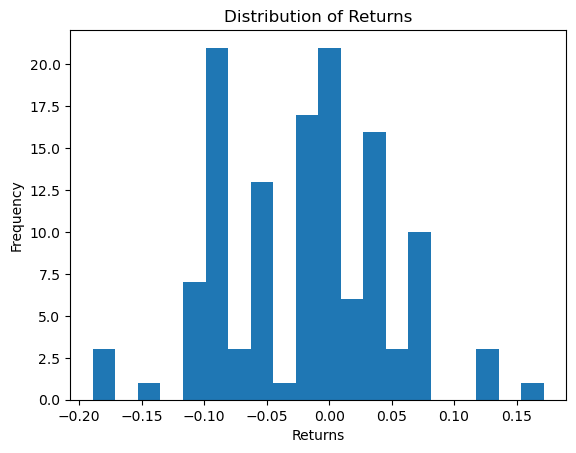

Mean return: -0.02186198634887946
Standard deviation of return: 0.06884379977770783

Percentage of positives return values: 43.65079365079365

Percentage of negatives return values: 52.38095238095239

Percentage of zero return values: 3.968253968253968

It is more probable to obtain a negative return.


In [69]:
import matplotlib.pyplot as plt
# Plot the returns for each portfolio using a histogram
plt.hist(df_portfolio_allocation['RETURN'], bins=20)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Returns')
plt.show()

# Calculate the mean and standard deviation of the returns
mean_return = df_portfolio_allocation['RETURN'].mean()
std_return = df_portfolio_allocation['RETURN'].std()

print('Mean return:', mean_return)
print('Standard deviation of return:', std_return)

# Analyze the distribution of returns to determine whether it is more probable to obtain a positive or negative return
print('\nPercentage of positives return values:', sum(y>0 for y in list_return)/len(list_return)*100)

print('\nPercentage of negatives return values:', sum(y<0 for y in list_return)/len(list_return)*100)

print('\nPercentage of zero return values:', sum(y==0 for y in list_return)/len(list_return)*100)

if mean_return > 0 and df_portfolio_allocation['RETURN'].skew() < 0:
    print('\nIt is more probable to obtain a positive return.')
elif mean_return < 0 and df_portfolio_allocation['RETURN'].skew() > 0:
    print('\nIt is more probable to obtain a negative return.')
else:
    print('\nIt is equally probable to obtain a positive or negative return.')

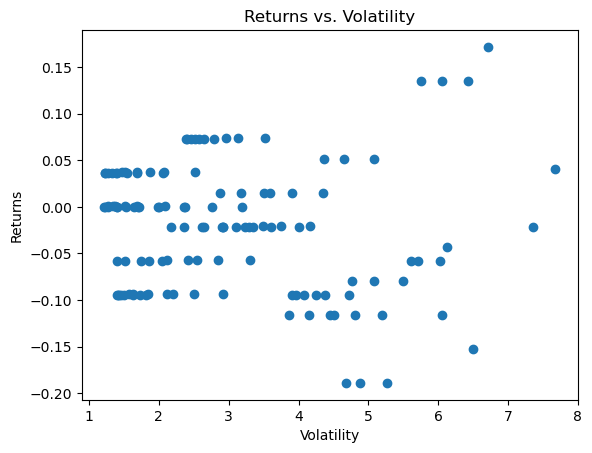

Correlation coefficient between returns and volatility: -0.09792595165701315
There is a negative relationship between returns and volatility, which means that the higher the risk, the lower the obtained return.


In [71]:
# Plot the returns versus volatility for each portfolio using a scatter plot
plt.scatter(df_portfolio_allocation['VOLAT'], df_portfolio_allocation['RETURN'])
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Returns vs. Volatility')
plt.show()

# Calculate the correlation coefficient between returns and volatility
corr = df_portfolio_allocation['RETURN'].corr(df_portfolio_allocation['VOLAT'])

print('Correlation coefficient between returns and volatility:', corr)

# Analyze the relationship between returns and volatility
if corr > 0:
    print('There is a positive relationship between returns and volatility, but it is not always true that the higher the risk, the higher the obtained return is.')
elif corr < 0:
    print('There is a negative relationship between returns and volatility, which means that the higher the risk, the lower the obtained return.')
else:
    print('There is no relationship between returns and volatility.')